In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adamz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
COLOR = 'white'
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR

In [9]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [12]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'Sentiment Data Distribution')

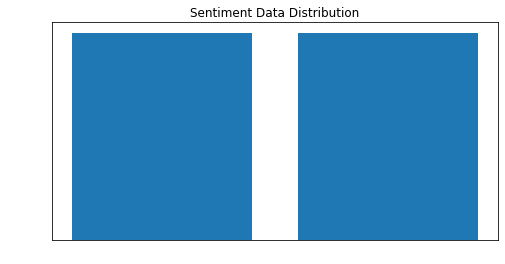

In [13]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [14]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,sentiment,text
68191,Negative,My heart love and prayers goes out to the Cook...
737039,Negative,Our two main TV's are broken. This is a huge t...
1333455,Positive,@gaetou awww thnx youi sweety &lt;333 i'll pas...
165279,Negative,misses driving already
1159669,Positive,@Spoelda_Mae well ladida im inviting @ohlivian...
1099674,Positive,@Falahales haley james scott! I'm rich again!
959518,Positive,@Pixiemevintage nice pics you're making fans ...
1561624,Positive,Shower times the best time
1455061,Positive,@lancearmstrong I love willie nelson
1445043,Positive,@quernzy It wasn't OH. It was YOU!


In [15]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [16]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [17]:
df.text = df.text.apply(lambda x: preprocess(x))

KeyboardInterrupt: 

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [18]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [21]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [22]:
train_data.head(10)

,sentiment,text
23786,Negative,i need friends
182699,Negative,@IAMtheCOMMODORE im trying to call! but is im...
476661,Negative,@davemclellan Had a good pace going (3k after ...
1181490,Positive,@BHinesTheReal are u gonna be doing any shows ...
878773,Positive,@Buenobye Hell yea get em into tattoos so they...
130866,Negative,"Yeah, where? but I need 2 see if ur mom calls ..."
1235876,Positive,@AnnieMcBeth Sounds like my cup of tea. Where ...
717314,Negative,"i'm tired but i don't want to sleep, wtf"
969880,Positive,@lilyroseallen http://twitpic.com/5dflq - Amaz...
748698,Negative,Thank god WKRN ABC affiliate for Nashville is ...


In [23]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

KeyboardInterrupt: 

In [24]:
from keras.utils import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [25]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
labels = train_data.sentiment.unique().tolist()

In [27]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


In [31]:
import wget, unzip

wget.download('http://nlp.stanford.edu/data/glove.6B.zip')
#!unzip glove.6B.zip

ModuleNotFoundError: No module named 'wget'

In [186]:
GLOVE_EMB = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-4
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [163]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

UnicodeDecodeError: 'charmap' codec can't decode byte 0x98 in position 8015: character maps to <undefined>

In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [164]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [165]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [476]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [197]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name='Adagrad'
), 
              loss=tf.keras.losses.BinaryFocalCrossentropy(
    gamma=2.0,
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    name='binary_focal_crossentropy'),
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [198]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on GPU...


In [199]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test))

Epoch 1/10
1250/1250 [==============================] - 178s 140ms/step - loss: 0.1437 - accuracy: 0.7090 - val_loss: 0.1415 - val_accuracy: 0.7057
Epoch 2/10
1250/1250 [==============================] - 177s 142ms/step - loss: 0.1396 - accuracy: 0.7125 - val_loss: 0.1412 - val_accuracy: 0.7060
Epoch 3/10
1250/1250 [==============================] - 175s 140ms/step - loss: 0.1394 - accuracy: 0.7131 - val_loss: 0.1412 - val_accuracy: 0.7061
Epoch 4/10
1250/1250 [==============================] - 177s 142ms/step - loss: 0.1394 - accuracy: 0.7131 - val_loss: 0.1411 - val_accuracy: 0.7062
Epoch 5/10
1250/1250 [==============================] - 175s 140ms/step - loss: 0.1393 - accuracy: 0.7132 - val_loss: 0.1411 - val_accuracy: 0.7063
Epoch 6/10
1250/1250 [==============================] - 176s 141ms/step - loss: 0.1393 - accuracy: 0.7131 - val_loss: 0.1410 - val_accuracy: 0.7065
Epoch 7/10
1250/1250 [==============================] - 177s 142ms/step - loss: 0.1392 - accuracy: 0.7139 - val_

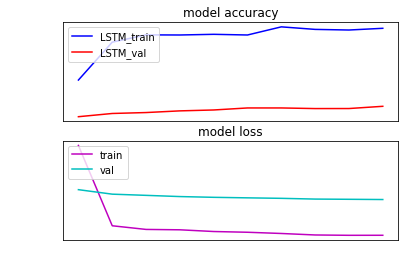

In [200]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [201]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 2s 49ms/step


In [2]:
model=tf.keras.models.load_model('sentiment140')

#!python -m tf2onnx.convert --saved-model sentiment140 --output model_sentiment140.onnx --tag serve 

In [203]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 261s 26ms/step - loss: 0.1409 - accuracy: 0.7066


[0.14094911515712738, 0.7066406011581421]

In [34]:
import time

t1=[]
pred=[]
for i in x_test[10000:20000]:
    i=np.array([i])
    s=time.time()
    pred+=[model.predict(i).argmax()]
    e=time.time()
    t1+=[e-s]

1/1 [==============================] - 0s 63ms/step


KeyboardInterrupt: 

In [3]:
import pathlib

model_file=pathlib.Path("sentiment140/")/"saved_model.pb"
#model_file.mkdir(exist_ok=True, parents=True)
m1=model_file.stat().st_size

In [4]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
converter.allow_custom_ops = True
converter.experimental_new_converter = True
tflite_quant_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\adamz\AppData\Local\Temp\tmp6vrnr_1q\assets


INFO:tensorflow:Assets written to: C:\Users\adamz\AppData\Local\Temp\tmp6vrnr_1q\assets


In [5]:
import pathlib

tflite_models_dir = pathlib.Path("sentiment140_tflite_models_org/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

In [6]:
# Save the quantized model:
tflite_model_quant_file = tflite_models_dir/"sentiment140_model_quant_org.tflite"
tflite_model_quant_file.write_bytes(tflite_quant_model)
tflite_model_quant_file.stat().st_size

350683908

In [28]:
interpreter = tf.lite.Interpreter(model_path=str(tflite_model_quant_file))
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

predictions = np.zeros((len(x_test[0]),), dtype=int)

In [29]:
interpreter.set_tensor(input_details["index"], [x_test[1]])
interpreter.invoke()
output = interpreter.get_tensor(output_details["index"])[0]
predictions = output.argmax()

In [31]:
predictions = []
t = []
for i in x_test[10000:20000]:
    interpreter.set_tensor(input_details["index"], np.array([i]))
    s=time.time()
    interpreter.invoke()
    e=time.time()
    t+=[e-s]
    output = interpreter.get_tensor(output_details["index"])[0]
    predictions += [output.argmax()]

In [32]:
tak=0
nie=0
for i in range(len(pred)):
    if predictions[i]==y_test[10000:20000][i].argmax():
        tak+=1
    else:
        nie+=1

In [33]:
tak/(tak+nie)

1.0

In [208]:
#Kwantyzacja zakresu dynamicznego

In [237]:
converter = tf.lite.TFLiteConverter.from_saved_model('sentiment140')
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
converter.allow_custom_ops = True
converter.experimental_new_converter = True
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [238]:
import pathlib

tflite_models_dir = pathlib.Path("sentiment140_tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

In [239]:
# Save the quantized model:
tflite_model_quant_file = tflite_models_dir/"sentiment140_model_quant.tflite"
tflite_model_quant_file.write_bytes(tflite_quant_model)
m2=tflite_model_quant_file.stat().st_size

In [240]:
interpreter = tf.lite.Interpreter(model_path=str(tflite_model_quant_file))
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

predictions = np.zeros((len(x_test[0]),), dtype=int)

In [241]:
interpreter.set_tensor(input_details["index"], [x_test[1]])
interpreter.invoke()
output = interpreter.get_tensor(output_details["index"])[0]
predictions = output.argmax()

In [242]:
len(x_test[10000:20000])

10000

In [344]:
tak1=0
nie1=0
for i in range(len(pred)):
    if pred[i]==y_test[10000:20000][i].argmax():
        tak1+=1
    else:
        nie1+=1

In [245]:
predictions = []
t2 = []
for i in x_test[10000:20000]:
    interpreter.set_tensor(input_details["index"], np.array([i]))
    s=time.time()
    interpreter.invoke()
    e=time.time()
    t2+=[e-s]
    output = interpreter.get_tensor(output_details["index"])[0]
    predictions += [output.argmax()]

In [265]:
tak2=0
nie2=0
for i in range(len(predictions)):
    if predictions[i]==y_test[i].argmax():
        tak2+=1
    else:
        nie2+=1

In [266]:
tak2/(tak2+nie2)

1.0

In [248]:
print(max(t1))
print(np.array(t1).argmax())
print(max(t2))

0.09755587577819824
4740
0.02700042724609375


In [230]:
t1[np.array(t1).argmax()]=np.mean(t1)

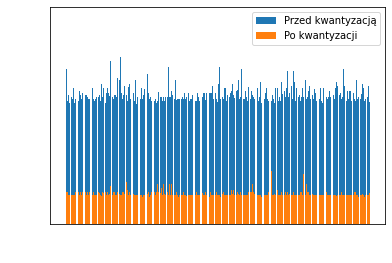

In [249]:
plt.bar(range(1,len(t1)+1),t1)
plt.bar(range(1,len(t2)+1),t2)
plt.xlabel("Numery próbek")
plt.ylabel("Czas w [s]")
plt.legend(["Przed kwantyzacją","Po kwantyzacji"])

In [250]:
#Kwantyzacja float16

In [251]:
converter = tf.lite.TFLiteConverter.from_saved_model('sentiment140')
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
converter.allow_custom_ops = True
converter.experimental_new_converter = True
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_quant_model = converter.convert()

In [253]:
import pathlib

tflite_models_dir = pathlib.Path("sentiment140_tflite_models_float16/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

In [259]:
# Save the quantized model:
tflite_model_quant_file = tflite_models_dir/"sentiment140_model_quant_float16.tflite"
tflite_model_quant_file.write_bytes(tflite_quant_model)
m3=tflite_model_quant_file.stat().st_size

In [260]:
interpreter = tf.lite.Interpreter(model_path=str(tflite_model_quant_file))
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

predictions = np.zeros((len(x_test[0]),), dtype=int)

In [261]:
interpreter.set_tensor(input_details["index"], [x_test[1]])
interpreter.invoke()
output = interpreter.get_tensor(output_details["index"])[0]
predictions = output.argmax()

In [262]:
predictions = []
t3 = []
for i in x_test[10000:20000]:
    interpreter.set_tensor(input_details["index"], np.array([i]))
    s=time.time()
    interpreter.invoke()
    e=time.time()
    t3+=[e-s]
    output = interpreter.get_tensor(output_details["index"])[0]
    predictions += [output.argmax()]

In [264]:
tak3=0
nie3=0
for i in range(len(predictions)):
    if predictions[i]==y_test[i].argmax():
        tak3+=1
    else:
        nie3+=1

In [267]:
tak3/(tak3+nie3)

1.0

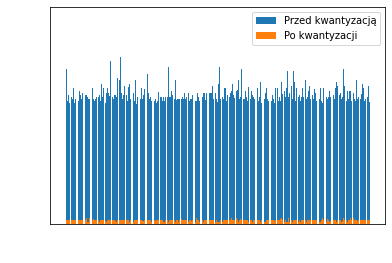

In [268]:
plt.bar(range(1,len(t1)+1),t1)
plt.bar(range(1,len(t2)+1),t3)
plt.xlabel("Numery próbek")
plt.ylabel("Czas w [s]")
plt.legend(["Przed kwantyzacją","Po kwantyzacji"])

In [269]:
#Kwantyzacja z aktywacjami int16

In [367]:
converter = tf.lite.TFLiteConverter.from_saved_model('sentiment140')
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
converter.allow_custom_ops = True
converter.experimental_new_converter = True
converter._experimental_lower_tensor_list_ops = False
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.EXPERIMENTAL_TFLITE_BUILTINS_ACTIVATIONS_INT16_WEIGHTS_INT8]
tflite_quant_model = converter.convert()

In [467]:
import pathlib

tflite_models_dir = pathlib.Path("sentiment140_tflite_models_int16x8/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

In [468]:
# Save the quantized model:
tflite_model_quant_file = tflite_models_dir/"sentiment140_model_quant_int16x8.tflite"
tflite_model_quant_file.write_bytes(tflite_quant_model)
m4=tflite_model_quant_file.stat().st_size

In [469]:
interpreter = tf.lite.Interpreter(model_path=str(tflite_model_quant_file))
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

predictions = np.zeros((len(x_test[0]),), dtype=int)

RuntimeError: Encountered unresolved custom op: TensorListReserve.
See instructions: https://www.tensorflow.org/lite/guide/ops_customNode number 1 (TensorListReserve) failed to prepare.Encountered unresolved custom op: TensorListReserve.
See instructions: https://www.tensorflow.org/lite/guide/ops_customNode number 1 (TensorListReserve) failed to prepare.

In [372]:
interpreter.set_tensor(input_details["index"], [x_test[1]])
interpreter.invoke()
output = interpreter.get_tensor(output_details["index"])[0]
predictions = output.argmax()

ValueError: Cannot set tensor: Tensor is unallocated. Try calling allocate_tensors() first

In [373]:
predictions = []
t4 = []
for i in x_test[10000:20000]:
    interpreter.set_tensor(input_details["index"], np.array([i]))
    s=time.time()
    interpreter.invoke()
    e=time.time()
    t4+=[e-s]
    output = interpreter.get_tensor(output_details["index"])[0]
    predictions += [output.argmax()]

ValueError: Cannot set tensor: Tensor is unallocated. Try calling allocate_tensors() first

In [374]:
tak4=0
nie4=0
for i in range(len(predictions)):
    if predictions[i]==y_test[i].argmax():
        tak4+=1
    else:
        nie4+=1

In [298]:
tak4/(tak4+nie4)

ZeroDivisionError: division by zero

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10000,) and arg 1 with shape (0,).

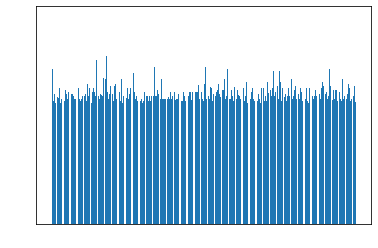

In [299]:
plt.bar(range(1,len(t1)+1),t1)
plt.bar(range(1,len(t2)+1),t4)
plt.xlabel("Numery próbek")
plt.ylabel("Czas w [s]")
plt.legend(["Przed kwantyzacją","Po kwantyzacji"])

In [300]:
#Kwantyzacja liczb całkowitych po treningu

In [301]:
def representative_data_gen():
    for input_value in tf.data.Dataset.from_tensor_slices(x_test).batch(1).take(100):
    # Model has only one input so each data point has one element.
        yield [input_value]

converter = tf.lite.TFLiteConverter.from_saved_model('sentiment140')
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
converter.allow_custom_ops = True
converter.experimental_new_converter = True
converter._experimental_lower_tensor_list_ops = False
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen

tflite_quant_model = converter.convert()

In [302]:
import pathlib

tflite_models_dir = pathlib.Path("sentiment140_tflite_models_calkowite/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

In [303]:
# Save the quantized model:
tflite_model_quant_file = tflite_models_dir/"imdb_model_quant_calkowite.tflite"
tflite_model_quant_file.write_bytes(tflite_quant_model)
m5=tflite_model_quant_file.stat().st_size

In [305]:
interpreter = tf.lite.Interpreter(model_path=str(tflite_model_quant_file))
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

predictions = np.zeros((len(x_test[0]),), dtype=int)

In [307]:
interpreter.set_tensor(input_details["index"], [x_test[1]])
interpreter.invoke()
output = interpreter.get_tensor(output_details["index"])[0]
predictions = output.argmax()

In [309]:
predictions = []
t5 = []
for i in x_test[10000:20000]:
    interpreter.set_tensor(input_details["index"], np.array([i]))
    s=time.time()
    interpreter.invoke()
    e=time.time()
    t5+=[e-s]
    output = interpreter.get_tensor(output_details["index"])[0]
    predictions += [output.argmax()]

In [311]:
tak5=0
nie5=0
for i in range(len(predictions)):
    if predictions[i]==y_test[i].argmax():
        tak5+=1
    else:
        nie5+=1

In [312]:
tak5/(tak5+nie5)

1.0

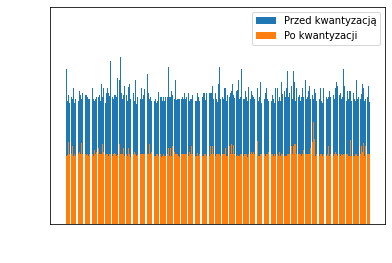

In [313]:
plt.bar(range(1,len(t1)+1),t1)
plt.bar(range(1,len(t2)+1),t5)
plt.xlabel("Numery próbek")
plt.ylabel("Czas w [s]")
plt.legend(["Przed kwantyzacją","Po kwantyzacji"])

In [314]:
#ONNX

In [315]:
import onnx

onnx_model = onnx.load("model_sentiment140.onnx")
onnx.checker.check_model(onnx_model)
import onnxruntime as ort
import numpy as np

ort_session = ort.InferenceSession("model_sentiment140.onnx")


In [316]:
import pathlib

tflite_models_dir = pathlib.Path("")
# Save the quantized model:
tflite_model_quant_file = tflite_models_dir/"model_sentiment140.onnx"
tflite_model_quant_file.write_bytes(tflite_quant_model)
m6=tflite_model_quant_file.stat().st_size

In [318]:
predictions = []
t6=[]
for i in x_test[10000:20000]:
    ort_inputs = {ort_session.get_inputs()[0].name: np.array([i])}
    s=time.time()
    output=ort_session.run(None, ort_inputs)
    e=time.time()
    t6+=[e-s]
    predictions += [np.array(output).argmax()]

In [326]:
tak6=0
nie6=0
for i in range(len(predictions)):
    if predictions[i]==y_test[i].argmax():
        tak6+=1
    else:
        nie6+=1

In [327]:
tak6/(tak6+nie6)

1.0

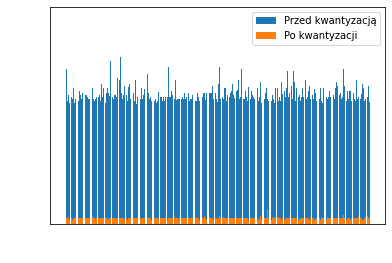

In [328]:
plt.bar(range(1,len(t1)+1),t1)
plt.bar(range(1,len(t2)+1),t6)
plt.xlabel("Numery próbek")
plt.ylabel("Czas w [s]")
plt.legend(["Przed kwantyzacją","Po kwantyzacji"])

In [329]:
std=[np.std(t1),np.std(t2),np.std(t3),np.std(t4),np.std(t5),np.std(t6)]

print(np.std(t1))
print(np.std(t2))
print(np.std(t3))
print(np.std(t4))
print(np.std(t5))
print(np.std(t6))

0.003594454778511775
0.001166173770081976
0.00046230180750421354
nan
0.0019719238804295314
0.00039993651529987394


C:\Users\adamz\miniconda3\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [330]:
mean=[np.mean(t1),np.mean(t2),np.mean(t3),np.mean(t4),np.mean(t5),np.mean(t6)]

print(np.mean(t1))
print(np.mean(t2))
print(np.mean(t3))
print(np.mean(t4))
print(np.mean(t5))
print(np.mean(t6))

0.06109458351135254
0.01434251823425293
0.0018540084362030028
nan
0.03321455547809601
0.002869308948516846


In [331]:
median=[np.median(t1),np.median(t2),np.median(t3),np.median(t4),np.median(t5),np.median(t6)]

print(np.median(t1))
print(np.median(t2))
print(np.median(t3))
print(np.median(t4))
print(np.median(t5))
print(np.median(t6))

0.059999942779541016
0.014000177383422852
0.0019998550415039062
nan
0.032999515533447266
0.0029997825622558594


In [332]:
var=[np.var(t1),np.var(t2),np.var(t3),np.var(t4),np.var(t5),np.var(t6)]

print(np.var(t1))
print(np.var(t2))
print(np.var(t3))
print(np.var(t4))
print(np.var(t5))
print(np.var(t6))

1.2920105154766134e-05
1.3599612620272092e-06
2.137229612216629e-07
nan
3.88848379020826e-06
1.599492162702063e-07


In [345]:
accuracy=[tak1/(tak1+nie1),tak2/(tak2+nie2),tak3/(tak3+nie3),tak5/(tak5+nie5),tak6/(tak6+nie6)]

print(tak1/(tak1+nie1))
print("Dynamiczny",tak2/(tak2+nie2))
print("Float16",tak3/(tak3+nie3))
#print("Int16",tak4/(tak4+nie4))
print("Pełna",tak5/(tak5+nie5))
print("ONNX",tak6/(tak6+nie6))

1.0
Dynamiczny 1.0
Float16 1.0
Pełna 1.0
ONNX 1.0


In [346]:
sr2=[]
sr3=[]
sr4=[]
sr5=[]
sr6=[]
for i in range(len(t1)):
    sr2+=[t1[i]/max(t2)]
    sr3+=[t1[i]/max(t3)]
    #sr4+=[t1[i]/max(t4)]
    sr5+=[t1[i]/t5[i]]
    sr6+=[t1[i]/max(t6)]

In [347]:
sr=[np.mean(sr2),np.mean(sr3),np.mean(sr4),np.mean(sr5),np.mean(sr6)]

print(np.mean(sr2))
print(np.mean(sr3))
#print(np.mean(sr4))
print(np.mean(sr5))
print(np.mean(sr6))

2.2627265470471887
12.218637039862674
1.8446799169502992
4.517156536454661


In [340]:
print(m1//1024)
print(m2//1024)
print(m3//1024)
print(m4//1024)
print(m5//1024)
print(m6//1024)

1878
171252
171252
85644
85652
85652
